In [1365]:
# <1> 加载数据集
from sklearn import datasets

from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target
 
print(X[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [1366]:
# <2> 数据预处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
print(X[0:5])

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


In [1367]:
# <3> 数据集划分 ——原始代码
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)
#print(X_train[0:5])
#print(y_train[0:5])

In [1368]:
#<3> K-fold数据集划分 ——修改后的代码
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)
for train_index, test_index in kf.split(X):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     print(X_train[0:5])
     print(y_train[0:5])
     print("TRAIN:", train_index, "TEST:", test_index) 
#for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
 #   X_train, X_val = X[train_idx], X[val_idx]
  #  y_train, y_val = y[train_idx], y[val_idx] 

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]
[0 0 0 0 0]
TRAIN: [  0   1   2   3   4   5   6   7   8  10  11  13  14  17  20  21  22  23
  25  26  27  28  32  33  34  35  36  37  38  39  40  43  44  46  47  48
  49  50  51  52  53

In [1369]:
# <4> 转换为PyTorch张量
import torch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train[0:5])
print(y_train[0:5])

tensor([[ 1.5186, -0.5622,  0.2321, -1.1696,  1.9139,  0.8090,  1.0348, -0.6596,
          1.2249,  0.2517,  0.3622,  1.8479,  1.0130],
        [ 0.1969,  0.0212,  1.1093, -0.2687,  0.0884,  0.8090,  1.2155, -0.4984,
          2.1360,  0.2690,  0.3183,  0.7886,  1.3951],
        [ 1.6915, -0.3468,  0.4879, -0.8093,  0.9309,  2.4914,  1.4665, -0.9819,
          1.0322,  1.1861, -0.4275,  1.1841,  2.3346],
        [ 0.2957,  0.2277,  1.8404,  0.4519,  1.2820,  0.8090,  0.6634,  0.2268,
          0.4014, -0.3193,  0.3622,  0.4496, -0.0379],
        [ 1.4816, -0.5174,  0.3052, -1.2897,  0.8607,  1.5621,  1.3661, -0.1761,
          0.6642,  0.7319,  0.4061,  0.3366,  2.2390]])
tensor([0, 0, 0, 0, 0])


In [1370]:
# <5> 定义模型

import torch.nn as nn
import torch.optim.adam

# <5-1> 网络模型
model = nn.Sequential(
    nn.Linear(13, 10), #这一层将输入的 13 维特征转换为 64 维特征
    nn.Sigmoid(),  #ReLU 将输入中的负值变为 0，正值保持不变。这一层引入了非线性，使模型能够学习更复杂的模式
    
    
    nn.Linear(10, 3) #这一层将输入的 128 维特征转换为 3 维特征
) 

# 利用索引查询模型中的第1层、第2层、第3层、第4层
print(model[0])
print(model[1])
print(model[2])


# <5-2> 损失函数
Loss = nn.CrossEntropyLoss()  # 交叉熵

# <5-3> 优化器

optimizer = torch.optim.SGD(model.parameters(),momentum=0.9, lr=0.01)

# <5-4> L1 正则化
l1_lambda = 0.001

Linear(in_features=13, out_features=10, bias=True)
Sigmoid()
Linear(in_features=10, out_features=3, bias=True)


In [1371]:
# <6> 自定义计算准确率函数
def test(model,X_test,y_test,quiet=False):
      # <6-1> 进入评估模式
    model.eval()
    
    # <6-2> 关闭梯度下计算输出
    with torch.no_grad():
        # 由测试集 X_test，计算预测值 predicted
        outouts = model(X_test)
        _, predicted = torch.max(outouts.data,1) # 返回每一行中最大值的那个元素，且返回其索引（返回最大元素在这一行的列索引） 
        accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    
    ## ------------ 显示上面的数据 ------------
    quiet or print("输出值(1-5):",outouts[0:5], sep="\n") #如果 quiet 为 False，则打印输出前 5 个测试样本的预测值 outputs。
    quiet or print("预测值(1-5):",predicted[0:5], sep="\n") #
    quiet or print("真实值(1-5):",y_test[0:5], sep="\n")
    quiet or print("test总数：",y_test.size(0))
    quiet or print("正确总数：", (predicted == y_test).sum().item())
    quiet or print("正确总数：",(predicted == y_test).sum())
    quiet or print(f"准确率:, {accuracy:.0%}")
    return accuracy ,predicted

In [1372]:
from tqdm import tqdm  # 进度条库 !pip install tqdm

# 初始化训练过程中的指标：训练精度、测试精度、损失，用于绘图
train_acc_history,test_acc_history,loss_history = [],[],[]

num_epochs = 10000 ## 迭代次数，重复训练100次
model.train()
# for epoch in range(num_epochs):
for epoch in tqdm(range(num_epochs)):
    # 1）向前传播计算结果
    outputs = model(X_train)
    # 2) 计算损失
    loss = Loss(outputs,y_train)
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    loss = loss + l1_lambda * l1_norm
     # 3）反向传播，计算梯度
    loss.backward()
      # 4) 更新权重
    optimizer.step()
    optimizer.zero_grad() #梯度清零准备下一次运算

    
    train_acc = test(model, X_train, y_train, quiet=True)[0]
    test_acc = test(model, X_test, y_test, quiet=True)[0]
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)
    loss_history.append(loss.item())

    # 打印训练信息
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

 10%|█         | 1037/10000 [00:03<00:24, 363.23it/s]

Epoch [1000/10000], Loss: 0.1079


 21%|██        | 2059/10000 [00:06<00:23, 345.20it/s]

Epoch [2000/10000], Loss: 0.0929


 31%|███       | 3053/10000 [00:08<00:20, 331.49it/s]

Epoch [3000/10000], Loss: 0.0878


 41%|████      | 4075/10000 [00:11<00:15, 383.19it/s]

Epoch [4000/10000], Loss: 0.0848


 51%|█████     | 5061/10000 [00:14<00:12, 395.42it/s]

Epoch [5000/10000], Loss: 0.0826


 60%|██████    | 6049/10000 [00:16<00:11, 344.10it/s]

Epoch [6000/10000], Loss: 0.0808


 71%|███████   | 7063/10000 [00:19<00:07, 368.35it/s]

Epoch [7000/10000], Loss: 0.0792


 80%|████████  | 8043/10000 [00:22<00:06, 323.03it/s]

Epoch [8000/10000], Loss: 0.0779


 91%|█████████ | 9055/10000 [00:25<00:02, 370.43it/s]

Epoch [9000/10000], Loss: 0.0765


100%|██████████| 10000/10000 [00:27<00:00, 360.10it/s]

Epoch [10000/10000], Loss: 0.0753


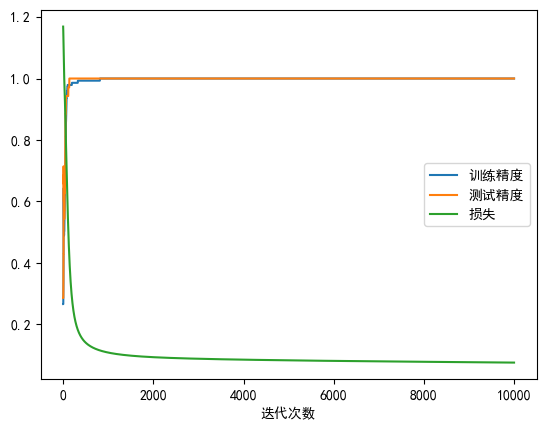

最终训练精度: 100%
最终测试精度: 100%


In [1373]:
# <8> 绘制训练过程中的指标
import matplotlib.pyplot as plt
from matplotlib import rcParams  # 设置全局参数，为了设置中文字体

# 定义绘制函数
def draw_plot(train_acc_history, test_acc_history, loss_history):
    rcParams['font.family'] = 'simHei' # 设置中文黑体字
    plt.figure()
    plt.plot(train_acc_history, label="训练精度")
    plt.plot(test_acc_history,  label="测试精度")
    plt.plot(loss_history,      label="损失")
    plt.legend() # 显示图例
    plt.xlabel("迭代次数")
    plt.show()

draw_plot(train_acc_history, test_acc_history, loss_history)
print(f"最终训练精度: {train_acc_history[-1]:.0%}")
print(f"最终测试精度: {test_acc_history[-1]:.0%}")

输出值(1-5):
tensor([[ 3.5677, -2.2336, -3.6956],
        [ 4.4670, -4.0723, -2.8959],
        [ 3.4031, -2.0940, -3.7647],
        [ 2.2971, -2.4555, -2.4744],
        [ 2.5557, -2.5237, -2.5914]])
预测值(1-5):
tensor([0, 0, 0, 0, 0])
真实值(1-5):
tensor([0, 0, 0, 0, 0])
test总数： 35
正确总数： 35
正确总数： tensor(35)
准确率:, 100%
[[11  0  0]
 [ 0 14  0]
 [ 0  0 10]]


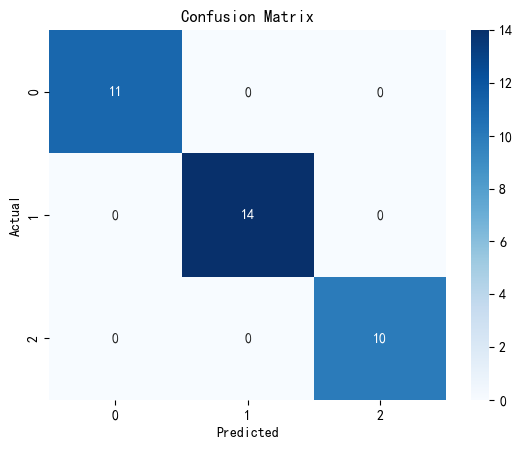

In [1374]:
# <9> 模型评估 
# 计算测试集的结果
accuracy, predicted = test(model, X_test, y_test)

# 计算混淆矩阵(Confusion Matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
print(cm)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues') # annot=True 显示数字
import matplotlib.pyplot as plt
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
